# Data Science Project: Battle of Neighborhood

## Determining the location of a coffee shop in the city of Toronto, Canada

#### by Reem Ajlan

##  Problem Description

Aser is an owner of a coffee shop in the downtown of Toronto. He used to live and work close to his coffee shop. He loves his coffee shop a lot and he takes very good care of it. Therefore, he used to go to it after work and spend the whole evening serving clients and making sure that they are happy and satisfied.

Recently, he got a job offer in Scarborough. However, given the far distance from his current place, he unfortunately must move since he decided to accept the offer. He knew that the time he moves, it would be difficult for him to keep coming to the coffee shop and to keep the work going perfectly as usual.

Therefore, he decided to relocate his coffee shop to be close to where he would live and work in Scarborough. This is a big decision to take because he might lose some of his clients. Therefore, before he moves forward with his decision, he needs to know if this is the right decision to take. He asked for a help to discover Scarborough and compare between the two neighborhoods. 

#### Interest

Why would you be interested in this notebook?

1- If you have a business in Toronto and you want to change the location. 

2- If you want to start a new business in Toronto and need to know more about locations and neighborhoods.

3- If you want to move to either Downtown Toronto or Scarborough in Toronto and need to discover the area.

4- If you want to visit Toronto and want to find the best coffee shops.  

For the above four conditions, this notebook will be helpful.

 
This model is specified to discover two neighborhoods in Toronto, Downtown Toronto and Scarborough.

## Data Description

#### In order to answer the above questions, we need data containing Tornoto neighborhoods, boroughs to include boundaries, latitude, longitude, coffee shops, and coffee shops ratings and tips


- The data with Toronto neighborhoods will be obtained from a Wikipedia page: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M that has all the information we need to explore and cluster the neighborhoods in Toronto. We will scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas data frame so that it is in a structured format.


- Toronto data containing neighborhood boundaries will be obtained from http://cocl.us/Geospatial_data


- All data related to locations of coffee shops will be obtained via the FourSquare API utilized via the Request library in Python.

The data containing neighborhoods and boundaries will be used to discover coffee shops around the new neighborhood via the FourSquare API utilized. This discovery will give us an idea if opening a new coffee shop would be a good idea.

## Methodology

In this project, we will start by importing the data, cleaning it, and importing necessary libraries. Then, we will create two individual data frames with the two boroughs of interest, Downtown Toronto and Scarborough, and map them to take a look at their locations.

Then, we will use the whole data for further analysis. We will start by taking a look at the number of neighborhoods in each borough. Then, we will use the FourSquare API to explore the number of coffee shops in each borough, identified Coffee shops (according to Foursquare categorization).

Then, we will explore the top three neighborhoods that have the highest numbers of coffee shops. We will be able to know their names, in which borough they are located, names of coffee shops, and ID of coffee shops. Next, we will explore ratings, likes, and tips. We will be able to see what coffee shops have the highest ratings and where they are located. We will also take a look at the average rating of coffee shops per borough.

Finally, we will map the top coffee shops for visualization.

## Data analysis

###  1. Data acquisition and cleaning

Let's import Tornoto data

In [3]:
import pandas as pd

url= 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

dfs= pd.read_html(url)

#creat a new data frame with the first table 
df= dfs[0]
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


Now, let's manipulate the table to be ready for exploring 

In [4]:
#drop cells w/ "not assigned" from Borough

df.drop(df[df['Borough']=='Not assigned'].index, inplace=True)

In [5]:
#combine rows w/ the same postal codes and add a comma between them

df= df.groupby(['Postal Code','Borough'], as_index=False).agg(lambda x: ','.join(x))

In [6]:
#if a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

mask = df['Neighbourhood'] == "Not assigned"
df.loc[mask, 'Neighbourhood'] = df.loc[mask, 'Borough']

df.shape

(103, 3)

Now, let's import Toronto data containing neighborhood boundaries and merge it to the same data frame

In [7]:
data = pd.read_csv('http://cocl.us/Geospatial_data')

#define new data frame w/ Latitude & Longitude

df_new = pd.DataFrame(data)
df_new.head()

#add Latitude & Longitude to the original data frame 

df["Latitude"]= df_new["Latitude"]
df["Longitude"] = df_new["Longitude"]

df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [8]:
#drop postal codes

df= df.drop(['Postal Code'], axis = 1) 
df

,Borough,Neighbourhood,Latitude,Longitude
0,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476
5,Scarborough,Scarborough Village,43.744734,-79.239476
6,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


### 2. Analyzing Data

Now that our data is ready, let's analyze it. First, we need to import some needed libraries 

In [8]:
import numpy as np 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0
import folium 

import os

%matplotlib inline
import seaborn as sns


print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

#### First let's take a look at Downtown Toronto by maping it

In [93]:
# Create a new data frame with Scarborough 

Downtown_data = df[df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
Downtown_data.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Downtown Toronto,Rosedale,43.679563,-79.377529
1,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675
2,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [10]:
address = 'Downtown Toronto, Ontario'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6563221, -79.3809161.


In [11]:
# create map of Manhattan using latitude and longitude values
map_Downtown = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Downtown_data['Latitude'], Downtown_data['Longitude'], Downtown_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Downtown)  
map_Downtown  

#### Now let's map Scarborough

In [12]:
# Create a new data frame with Scarborough 

Scarborough_data = df[df['Borough'] == 'Scarborough'].reset_index(drop=True)
Scarborough_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [12]:
address = 'Scarborough, Ontario'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Scarborough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Scarborough are 43.773077, -79.257774.


In [13]:
# create map of Manhattan using latitude and longitude values
map_Scarborough = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Scarborough_data['Latitude'], Scarborough_data['Longitude'], Scarborough_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
map_Scarborough   

#### Let's see how many neighborhoods in each borough

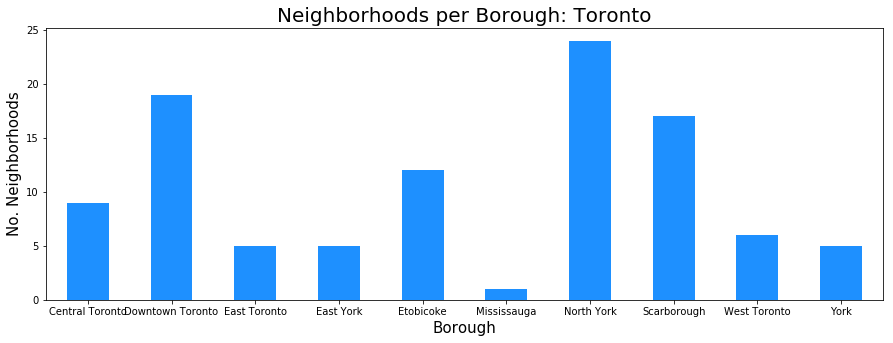

In [14]:

clr = "dodgerblue"
df.groupby('Borough')['Neighbourhood'].count().plot.bar(figsize=(15,5), color=clr)
plt.title('Neighborhoods per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

Looking at the resutls, the number of neighbourhoods in Downtown Toronto is almost similar to the number of neighbourhoods in Scorborough

### 3. Foursquare

#### Define Foursquare Credentials and Versio

In [11]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 5WZFM3XVH1RNYKBGNOSMEG3WUJX4CBAUCSX1FAL5NRLCGQG0
CLIENT_SECRET:YOQDZAMM44IXXH0WDUKBMVSXTEW0I1G0VGMKVWC1ECJGWMRF


Let's create functions for later use

In [16]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_toronto_data():
    url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighbourhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    toronto_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        Neighbourhood_name = data['properties']['name']
        Neighbourhood_latlon = data['geometry']['coordinates']
        Neighbourhood_lat = Neighbourhood_latlon[1]
        Neighbourhood_lon = Neighbourhood_latlon[0]
        df = toronto_data.append({'Borough': borough,
                                          'Neighbourhood': Neighbourhood_name,
                                          'Latitude': Neighbourhood_lat,
                                          'Longitude': Neighbourhood_lon}, ignore_index=True)
    return df

#### Let's analyze further and see how many coffee shops there are in each neighborhood and burough and graph the results.



In [94]:
# queens has most neighborhoods
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighbourhood', 'ID', 'Name']
coffee_shops_toronto=pd.DataFrame(columns=column_names)
count=1
for row in df.values.tolist():
    Borough, Neighbourhood, Latitude, Longitude=row
    venues = get_venues(Latitude, Longitude)
    coffee_shops=venues[venues['Category']=='Coffee Shop']   
    print('(',count,'/',len(df),')','coffee shops in '+Neighbourhood+', '+Borough+':'+str(len(coffee_shops)))
    print(row)
    for resturant_detail in coffee_shops.values.tolist():
        id, name , category=resturant_detail
        coffee_shops_toronto = coffee_shops_toronto.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) coffee shops in Malvern, Rouge, Scarborough:0
['Scarborough', 'Malvern, Rouge', 43.806686299999996, -79.19435340000001]
( 2 / 103 ) coffee shops in Rouge Hill, Port Union, Highland Creek, Scarborough:0
['Scarborough', 'Rouge Hill, Port Union, Highland Creek', 43.7845351, -79.16049709999999]
( 3 / 103 ) coffee shops in Guildwood, Morningside, West Hill, Scarborough:0
['Scarborough', 'Guildwood, Morningside, West Hill', 43.7635726, -79.1887115]
( 4 / 103 ) coffee shops in Woburn, Scarborough:1
['Scarborough', 'Woburn', 43.7709921, -79.21691740000001]
( 5 / 103 ) coffee shops in Cedarbrae, Scarborough:0
['Scarborough', 'Cedarbrae', 43.773136, -79.23947609999999]
( 6 / 103 ) coffee shops in Scarborough Village, Scarborough:0
['Scarborough', 'Scarborough Village', 43.7447342, -79.23947609999999]
( 7 / 103 ) coffee shops in Kennedy Park, Ionview, East Birchmount Park, Scarborough:1
['Scarborough', 'Kennedy Park, Ionview, East Birchmount Park', 43.7279292, -79.26202940000002]
( 8 

In [45]:
#Save the information so far to a .csv file due to limited calls on FourSquare

coffee_shops_toronto.to_csv('coffee_shops_toronto_tocsv1.csv') 

In [46]:
coffee_shops_toronto = pd.read_csv('coffee_shops_toronto_tocsv1.csv')

In [47]:
coffee_shops_toronto.shape

(161, 5)

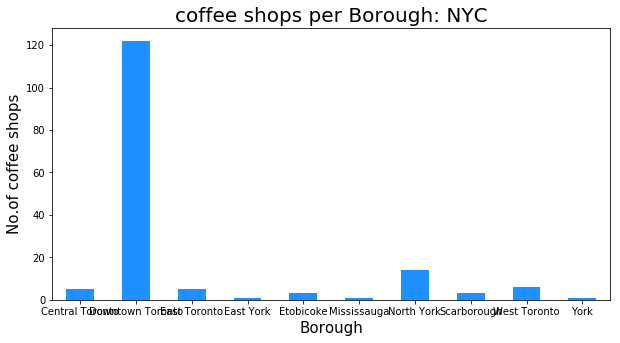

In [69]:
coffee_shops_toronto.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('coffee shops per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of coffee shops', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

Looking at the results, the number of coffee shops in Downtown Toronto is too high if compared to the other Boroughs in Toronto including Scarborough. 

This result is promising! 





#### Now, let's explore the top three neighborhoods that have the highest numbers of coffee shops

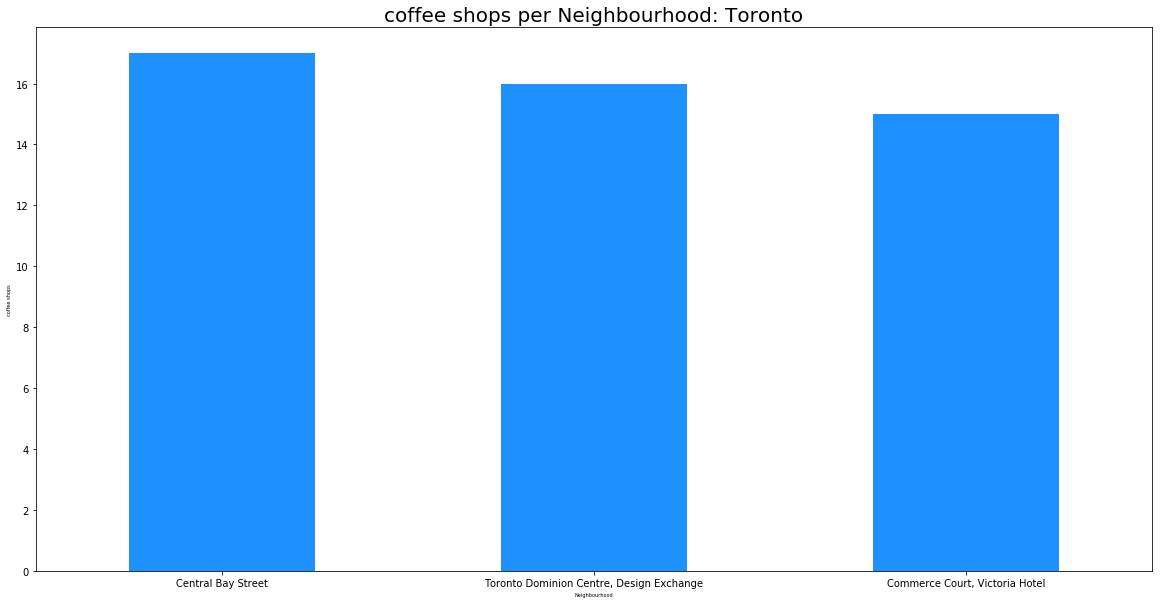

In [71]:
NOofNeigh = 3 # top number for graphing all the same past 3
coffee_shops_toronto.groupby('Neighbourhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(20,10), color=clr)
plt.title('coffee shops per Neighbourhood: Toronto', fontsize = 20)
plt.xlabel('Neighbourhood', fontsize = 5)
plt.ylabel('coffee shops', fontsize=5)
plt.xticks(rotation = 'horizontal')
plt.show()

#### The top three neighborhoods with the highest numbers of coffee shops

In [75]:
coffee_shops_toronto[coffee_shops_toronto['Neighbourhood']=='Central Bay Street']

,Unnamed: 0,Borough,Neighbourhood,ID,Name
50,50,Downtown Toronto,Central Bay Street,537d4d6d498ec171ba22e7fe,Jimmy's Coffee
51,51,Downtown Toronto,Central Bay Street,557231e3498e540f05f3083c,Tim Hortons
52,52,Downtown Toronto,Central Bay Street,5db70a0c306d6b000861ac9f,Neo Coffee Bar
53,53,Downtown Toronto,Central Bay Street,5a81ae339deb7d369fa7f146,Hailed Coffee
54,54,Downtown Toronto,Central Bay Street,576d30ed498ef2e95e26e6d0,Starbucks
55,55,Downtown Toronto,Central Bay Street,568bcf61498e3aaff5e351f8,Coffee Public
56,56,Downtown Toronto,Central Bay Street,4c6affbe9669e21e3708aa51,Tim Hortons
57,57,Downtown Toronto,Central Bay Street,4aeb5014f964a520c7c021e3,Starbucks
58,58,Downtown Toronto,Central Bay Street,51d85620498e93cd1678ebc5,Starbucks
59,59,Downtown Toronto,Central Bay Street,5c5a865bbe7078002c14a735,Starbucks


In [72]:
coffee_shops_toronto[coffee_shops_toronto['Neighbourhood']=='Toronto Dominion Centre, Design Exchange']

,Unnamed: 0,Borough,Neighbourhood,ID,Name
85,85,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",59cd51c71b0ea516e9e7b3aa,Pilot Coffee Roasters
86,86,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",4b6b4340f964a520c9fc2be3,Starbucks
87,87,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",592c5bfb31fd147e47255fb3,Dineen @CommerceCourt
88,88,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",563d2f2dcd10bcf27ae37c3b,Pilot Coffee Roasters
89,89,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",4b689994f964a52030822be3,Starbucks
90,90,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",557f05ca498ec78ac7b29315,Balzac's Coffee
91,91,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",4b0c001cf964a520853523e3,Tim Hortons
92,92,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",4c3c73137ea89521dc322247,Tim Hortons
93,93,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",4b8bce0af964a52038ac32e3,Tim Hortons
94,94,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",4b981b46f964a520c22c35e3,Starbucks


In [73]:
coffee_shops_toronto[coffee_shops_toronto['Neighbourhood']=='Commerce Court, Victoria Hotel']


,Unnamed: 0,Borough,Neighbourhood,ID,Name
101,101,Downtown Toronto,"Commerce Court, Victoria Hotel",59cd51c71b0ea516e9e7b3aa,Pilot Coffee Roasters
102,102,Downtown Toronto,"Commerce Court, Victoria Hotel",592c5bfb31fd147e47255fb3,Dineen @CommerceCourt
103,103,Downtown Toronto,"Commerce Court, Victoria Hotel",4b689994f964a52030822be3,Starbucks
104,104,Downtown Toronto,"Commerce Court, Victoria Hotel",563d2f2dcd10bcf27ae37c3b,Pilot Coffee Roasters
105,105,Downtown Toronto,"Commerce Court, Victoria Hotel",4adc55c6f964a520bd2b21e3,Starbucks
106,106,Downtown Toronto,"Commerce Court, Victoria Hotel",4b6b4340f964a520c9fc2be3,Starbucks
107,107,Downtown Toronto,"Commerce Court, Victoria Hotel",4b981b46f964a520c22c35e3,Starbucks
108,108,Downtown Toronto,"Commerce Court, Victoria Hotel",4b8bce0af964a52038ac32e3,Tim Hortons
109,109,Downtown Toronto,"Commerce Court, Victoria Hotel",4b0c001cf964a520853523e3,Tim Hortons
110,110,Downtown Toronto,"Commerce Court, Victoria Hotel",4b198909f964a52006df23e3,Starbucks


Looking at the results, the top three neighborhoods that have the highest numbers of coffee shops in Toronto are located in Downtown Toronto!


So, keeping a business successful in Downtown Toronto is a challenge 

#### Now let's explore LIKES, RATINGS, AND TIPS

In [97]:
column_names=['Borough', 'Neighbourhood', 'ID','Name','Likes','Rating','Tips']
coffee_shops_stats_toronto=pd.DataFrame(columns=column_names)
count=1
for row in coffee_shops_toronto.values.tolist():
    Borough,Neighbourhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(coffee_shops_toronto),')','processed')
    coffee_shops_stats_toronto = coffee_shops_stats_toronto.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
coffee_shops_stats_toronto.tail()

{'meta': {'code': 200, 'requestId': '5f19fb755f54b4532985e6d4'}, 'response': {'venue': {'id': '4cc1d28c06c254815ac18547', 'name': 'Starbucks', 'contact': {}, 'location': {'address': '300 Borough Dr', 'crossStreet': 'Scarborough Town Centre', 'lat': 43.770037201625215, 'lng': -79.22115586641958, 'labeledLatLngs': [{'label': 'display', 'lat': 43.770037201625215, 'lng': -79.22115586641958}], 'cc': 'CA', 'city': 'Scarborough', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['300 Borough Dr (Scarborough Town Centre)', 'Scarborough ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4cc1d28c06c254815ac18547', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'url': 'http://www.starbucks.com', 'price': {'tier': 1, 'message': 'Che

KeyError: 'venue'

In [ ]:
# I continue to save data to a .csv as I move through this project

coffee_shops_stats_toronto.to_csv('coffee_shops_stats_Toronto_csv.csv')

In [98]:
coffee_shops_stats_toronto.shape

(50, 7)

In [99]:
coffee_shops_stats_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough          50 non-null object
Neighbourhood    50 non-null object
ID               50 non-null object
Name             50 non-null object
Likes            50 non-null object
Rating           50 non-null float64
Tips             50 non-null object
dtypes: float64(1), object(6)
memory usage: 2.8+ KB


In [100]:
coffee_shops_stats_toronto['Likes']=coffee_shops_stats_toronto['Likes'].astype('float64')
coffee_shops_stats_toronto['Tips']=coffee_shops_stats_toronto['Tips'].astype('float64')
coffee_shops_stats_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough          50 non-null object
Neighbourhood    50 non-null object
ID               50 non-null object
Name             50 non-null object
Likes            50 non-null float64
Rating           50 non-null float64
Tips             50 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


In [101]:
coffee_shops_stats_toronto.describe()

,Likes,Rating,Tips
count,50.000000,50.000000,50.000000
mean,29.560000,6.946000,12.100000
std,45.001206,0.795962,20.647923
min,0.000000,5.700000,0.000000
25%,4.000000,6.300000,1.250000
50%,10.000000,6.850000,4.000000
75%,34.000000,7.400000,11.000000
max,231.000000,9.000000,102.000000


In [102]:
# coffee shops with maximum Likes
coffee_shops_stats_toronto.iloc[coffee_shops_stats_toronto['Likes'].idxmax()]

Borough                  Downtown Toronto
Neighbourhood              St. James Town
ID               4fff1f96e4b042ae8acddca5
Name                    Fahrenheit Coffee
Likes                                 231
Rating                                  9
Tips                                  102
Name: 46, dtype: object

In [103]:
# coffee shops with maximum Ratings
coffee_shops_stats_toronto.iloc[coffee_shops_stats_toronto['Rating'].idxmax()]

Borough                  Downtown Toronto
Neighbourhood              St. James Town
ID               4fff1f96e4b042ae8acddca5
Name                    Fahrenheit Coffee
Likes                                 231
Rating                                  9
Tips                                  102
Name: 46, dtype: object

In [104]:
# coffee shops with maximum Tips
coffee_shops_stats_toronto.iloc[coffee_shops_stats_toronto['Tips'].idxmax()]

Borough                  Downtown Toronto
Neighbourhood              St. James Town
ID               4fff1f96e4b042ae8acddca5
Name                    Fahrenheit Coffee
Likes                                 231
Rating                                  9
Tips                                  102
Name: 46, dtype: object

#### Let's take a look at neighborhoods with top ratings

In [105]:
toronto_neighborhood_stats=coffee_shops_stats_toronto.groupby('Neighbourhood',as_index=False).mean()[['Neighbourhood','Rating']]
toronto_neighborhood_stats.columns=['Neighbourhood','Average Rating']
toronto_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighbourhood,Average Rating
9,St. James Town,8.033333
1,Berczy Park,8.000000
12,Studio District,7.733333
8,"Regent Park, Harbourfront",7.633333
2,Church and Wellesley,7.466667
0,"Bathurst Manor, Wilson Heights, Downsview North",7.400000
14,"The Danforth West, Riverdale",7.350000
18,Woburn,6.900000
3,Davisville,6.850000
6,"Garden District, Ryerson",6.830769


#### Let's calculate average rating of coffee shops for each Borough and visualize the results

In [106]:
toronto_borough_stats=coffee_shops_stats_toronto.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
toronto_borough_stats.columns=['Borough','Average Rating']
toronto_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,East Toronto,7.580000
1,Downtown Toronto,7.126923
0,Central Toronto,6.625000
4,North York,6.590909
5,Scarborough,6.400000


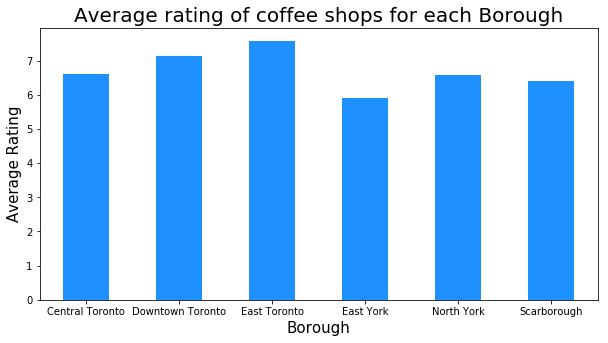

In [107]:
coffee_shops_stats_toronto.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color=clr)
plt.title('Average rating of coffee shops for each Borough', fontsize=20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()


#### We will visually map the neighborhoods with an average rating greater than or equal to 7 after joining the approprite dfs to include latitudes and longitudes.

In [114]:
toronto_neighborhood_stats=toronto_neighborhood_stats[toronto_neighborhood_stats['Average Rating']>=7.0]
toronto_neighborhood_stats

,Neighbourhood,Average Rating
1,Berczy Park,8.000000
8,"Regent Park, Harbourfront",7.633333
9,St. James Town,8.033333
12,Studio District,7.733333


In [116]:
toronto_neighborhood_stats=pd.merge(toronto_neighborhood_stats,df, on='Neighbourhood')
toronto_neighborhood_stats=toronto_neighborhood_stats[['Borough','Neighbourhood','Latitude','Longitude','Average Rating']]
toronto_neighborhood_stats

,Borough,Neighbourhood,Latitude,Longitude,Average Rating
0,Downtown Toronto,Berczy Park,43.644771,-79.373306,8.000000
1,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,7.633333
2,Downtown Toronto,St. James Town,43.651494,-79.375418,8.033333
3,East Toronto,Studio District,43.659526,-79.340923,7.733333


In [117]:
# create map and display it
toronto_map = folium.Map(location=geo_location('Toronto'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in toronto_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )


In [120]:
toronto_neighborhood_stats['Label']=toronto_neighborhood_stats['Neighbourhood']+', '+toronto_neighborhood_stats['Borough']+'('+toronto_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in toronto_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(toronto_map)        
# add incidents to map
toronto_map.add_child(incidents)

## Results and Discussion

Our analysis shows that although Downtown Toronto has a similar number of neighborhoods to Scarborough, it has a very large number of coffee shops if compared to the other boroughs including Scarborough. This result indicates that the success of a business located in Downtown Toronto is a challenge. 
 This first result supports the idea of relocate a coffee shop from Downtown Toronto to Scarborough. However, let's move forward and discuss the other results. 

After exploring the top three neighborhoods that have the highest numbers of coffee shops, the results show that they are all located in Downtown Toronto. 

The results of exploring coffee shops with maximum Likes and tips were found to belong to coffee shops in Downtown Toronto. This could mean that most coffee shops clients tend to buy their coffee from Downtown Toronto. 

Looking at the results of the average rating of coffee shops for each borough, Downtown Toronto got the second rank with an average rating of 7.13 , but Scarborough got the fifth rank with an average rating of 6.40. Additionally, the top three coffee shops with the top rating were found to be in Downtown Toronto 

After looking at the whole picture, my recommendation would be that if the coffee shop was already successful and clients were happy in Downtown Toronto, keep it where it is located. On the other hand, if the business was struggling because of the existence of many other coffee shops in the area, then relocating the business to Scarborough would be better since there are no many coffee shops in this new area. 

## Conclusion

The purpose of this project was to identify coffee shops in Scarborough in Toronto in order to determine if starting a coffee shop or relocate an old one to this area would be a successful idea. 
To achieve this purpose we have used data that contains information on neighborhoods in Toronto and other data that contains information on Toronto neighborhood boundaries. FourSquare API utilized was used for obtaining information about coffee shop locations.

By calculating coffee shop density distribution from Foursquare data, we noticed that Downtown Toronto has the most number of coffee shops. Additionally, by looking at the number of ratings, we came with a result that most coffee clients tend to buy their coffee from Downtown Toronto.  The average rating of coffee shops in Downtown Toronto was higher than Scarborough by 3 ranks.

The final recommendation was to keep the business where it is located in Downtown Toronto 
unless if it was affected by the existence of many other coffee shops in the area.